# Investigate a Dataset
### Case Study: TITANIC Dataset
#### By: Claire M.K
#### Date: Aug -2017
--------------------------------
## Introduction:
* Titanic was a British passenger liner built by the Harland and wolf Shipyard in Belfast. It was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. On april 15th 1912 , under the command of Edward smith and carrying an estimate of 2,224 passengers and crew, the ship collided with an iceberg during its maiden voyage from Southampton to New York City. Killing over 1500 people, including her commander Edward smith and Architect Thomas Andrews. “May their Souls rest in Peace”
* The ocean liner carried some of the wealthiest people in the world, as well as hundreds of emigrants from Great Britain and Ireland, Scandinavia and elsewhere throughout Europe who were seeking a new life in the United States. The Titanic carried women, men, children and teenagers of all ages from less than a year to 80yrs.The passengers paid different prices and also stayed in different cabins relative to their social and economic class.


## Dataset
The Titanic data set  contains information collected from a sample of 891 passengers from a population of the estimated 2224 people who were aboard the titanic ship on the fateful day when the ship sunck. There is information on gender, social class, Cabins, prices of tickets and port or embarkation.

### Research Questions: 
1. Which people survived most?
+ What factors contributed to survival?
* What were the characteristics of the people who survived?
* How does survival relate to gender, class and Age?

### Importing required packages 

In [261]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sb

import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')
from scipy.stats.stats import pearsonr

## Data Wrangling and Exploration.

### Getting data from CSV into a dataframe
The Titanic data is in a csv file, i will be reading it from excel csv  into a pandas dataframe to be able to work with it better.

In [262]:
#geting data from csv 
titanic_data = pd.read_csv('titanic_data.csv')
#displaying the first three rows
titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


## Initial exploration of the data
Now that i have my data, its time to take a closer look at whats available. In this section I will be taking a general look into the dataframe, the statistics, general meta data like the number of columns, rows, values, data types and general distributions of the data.

In [263]:
#show statistics for the data frame
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [264]:
#show a list of the column names
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [265]:
#display information about the dataframe
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


From the above display, we see that all fields have complete information except for Age, Cabin and Embarked.
- The age field has only 714 values out of the 891
- Cabin has 204 entries out of 891  
- Embarked only having 889 entries out of 891

I will be looking at how to deal with these missing values later on.

In [266]:
#looking at unique values column values

def unique_values(column_name):
    '''
    funtion takes in a column name and then returns a list of
    unique column values
    '''
    unic= column_name.unique()
    return unic 

#using the unique_value formula to show unique values of different columns
Sex_Unique_values= unique_values(titanic_data['Sex'])
Survive_Unique_values= unique_values(titanic_data['Survived'])
Parch_Unique_values=unique_values(titanic_data['Parch'])
Pclass_Unique_values=unique_values(titanic_data['Pclass'])
Embarked_Unique_values=unique_values(titanic_data['Embarked'])

#print out the values
print("Sex Values:{},Survived:{},Parch: {} Pclass: {} Embarked:{}".format(Sex_Unique_values,Survive_Unique_values,
                                                                             Parch_Unique_values,Pclass_Unique_values,Embarked_Unique_values))

Sex Values:['male' 'female'],Survived:[0 1],Parch: [0 1 2 5 3 4 6] Pclass: [3 1 2] Embarked:['S' 'C' 'Q' nan]


Number of unique rows.

In [267]:
 def num_of_rows(column_name):
    '''
    function takes in a column name and returns the sum
    column's unique values
    '''
    unic= column_name.unique()
    return len(unic)

#use function to show sum of unique values in each field
Unique_IDs =num_of_rows(titanic_data['PassengerId'])
Unique_Age=num_of_rows(titanic_data['Age'])
Unique_sibsp=num_of_rows(titanic_data['SibSp'])
Unique_Ticket=num_of_rows(titanic_data['Ticket'])
Unique_Cabin =num_of_rows(titanic_data['Cabin'])
Unique_Embarked=num_of_rows(titanic_data['Embarked'])

#Display the sum of unique values

print('Unique passenger Ids: {} , Unique Ages:{} ,Unique Sibsp: {}, Unique Tickets: {}, Unique cabins: {}'.format(Unique_IDs,Unique_Age,Unique_sibsp,
                                                                                                   Unique_Ticket,Unique_Cabin))


Unique passenger Ids: 891 , Unique Ages:89 ,Unique Sibsp: 7, Unique Tickets: 681, Unique cabins: 148


Since we have now looked at an over view of our data sets and discovered a few problems with the data, i will go ahead and clean the data getting ready for analysis.

## Data Wrangling- Cleaning the data
In this section, i will be working to fill up missing data, creating any extra columns that might be relevant to the analysis, drop any columns that are not relevant and change some field data types.

#### Missing Age Values:
From the above exploration, I discovered that age has only 714 non null values out of the expected 891.In order to fill up the missing values in the age column, i will group the data frame by Social class
    and then by Sex, then take the mean Age from each sub-group to replace the missing values


In [268]:
#missing Age Values
Missing_Age =titanic_data[titanic_data['Age'].isnull()]
#Number of missing age values
l= len(Missing_Age)
print('Missing ages:{}'.format(l))

# grouping the values by class and Sex and finding the mean for each group
MeanAges = titanic_data.groupby(['Pclass','Sex'])['Age'].mean()
#change ages to integers
np.round(MeanAges,2)


Missing ages:177


Pclass  Sex   
1       female    34.61
        male      41.28
2       female    28.72
        male      30.74
3       female    21.75
        male      26.51
Name: Age, dtype: float64

Fill up the missing values with the calculated mean Values

In [269]:
# replacing nulls with the calculated means
def replace_nulls(data):
    '''
    The function takes in a dataFrame, if a selected value from the selected column of 
    the data frame(data) is missing, it returns a value from the MeanAges dataframe if not
    it returns the value from the dataframe(data)
    '''
    if pd.isnull(data['Age']):
        return MeanAges[data['Pclass'],data['Sex']]
    else:
        return data['Age']
    
#using the replace_nulls function to update the titanic_data 
titanic_data['Age']=titanic_data.apply(replace_nulls, axis=1)

#usinge the info function to see if the age has no more missing values  
titanic_data.Age.describe()


count    891.000000
mean      29.318643
std       13.281103
min        0.420000
25%       21.750000
50%       26.507589
75%       36.000000
max       80.000000
Name: Age, dtype: float64

#### Missing Cabin Values:
In our earlier investigation we discovered that there were only 204 pasengers with cabins out of the 891, this number is so small compared to the sample, so instead of trying to fill up the missing values i decided that it might be more logical to eliminate the field from the dataset.

#### Missing Embarked Values:
To deal with these missing values I will look at the people with the missing  values and compare them to people in the datasets  with similar traits like cabin, ticket numbers and fare. 

In [270]:
#missing Embarked 
Embarked_Missing= titanic_data[titanic_data['Embarked'].isnull()]
Embarked_Missing

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


From the above we can see that both these people were from cabin B28 with same ticket number 113572 and fare of 80 each.So am going to create a list of people with any of the mentioned field values.

In [271]:
#looking at people with similar records(cabin,Ticket,Fare)
Similar = titanic_data[(titanic_data['Cabin']== 'B28')|(titanic_data['Fare']== 80)|(titanic_data['Ticket']==113572)]
Similar

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Ooops looks like these two ladies are very unique. They dont share charactristics with anyother people on the ship. I will have to look at the distribution of disembarked cities. Then decide which one to give them.

In [272]:
S=len(titanic_data[titanic_data['Embarked']=='S'])
C=len(titanic_data[titanic_data['Embarked']=='C'])
Q=len(titanic_data[titanic_data['Embarked']=='Q'])
print("Q:{},C:{} ,S: {}".format(Q,C,S))

Q:77,C:168 ,S: 644


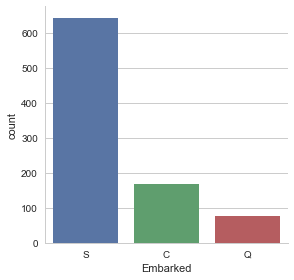

In [273]:
 sb.factorplot('Embarked', order=['S','C','Q'], data= titanic_data, kind='count') 

In [274]:
# replacing missing values with 'S'
titanic_data['Embarked'].fillna('S', inplace=True)
#checking to see if our values have been filled in correctly
titanic_data[(titanic_data['Cabin']=='B28')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


### Changing Some Of the Field Value discriptions:
To better undestand the data, I will modify some of the fields
1. Age => int data type
+ Survived =>  boolean (1 = True, 0 = False)
* Pclass => Social classes (1= First Class, 2 =Second Class, 3= Third Class)

I will also group the Age into Age groups to better analyse ages, I will also what to look at how the presence of other family members contributed to survival so i will join the parents and siblings table to form a new field called relatives.

In [275]:
def Up_date_data(data):
    '''
    function takes in the original dataframe and returns
    the updated dataframe
    '''
    #change the age from Float to int
    data.Age =data.Age.astype(int)
    #Change Pclass
    new_Class={1:'First Class',2:'Sec Class', 3:'Third Class'}
    data.Pclass =data.Pclass.map(new_Class)
    #Change Survived value discriptions
    new_survived = {0: False, 1: True}
    data.Survived = data.Survived.map(new_survived)
    #create new field Family to hold values of siblings and parents
    data.Family= data.Parch + data.SibSp
    #create the Age_group column
    age_bins = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
    data['age_group'] = pd.cut(data.Age, range(0, 81, 10), right=False, labels=age_bins)
    return data
Updated_titanic_data =Up_date_data(titanic_data)
#display the first three rows
Updated_titanic_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
0,1,False,Third Class,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,20-29
1,2,True,First Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,30-39
2,3,True,Third Class,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,20-29


In [276]:
#Updated_df.Fam_Presence
Updated_titanic_data['Family'] = Updated_titanic_data.SibSp + Updated_titanic_data.Parch


### Droping Un Wanted Fields
I am going to put my empasis on Sex, Age groups, Pessenger Class, and 
Survival. Some of the columns may
not do me any good so I will go ahead and drop them.

In [277]:
#dropping a few fields from the dataframe
Updated_df =Updated_titanic_data.drop(['Ticket','Name','Cabin','SibSp','Parch'], axis=1)
#display discriptions of the remaining fields
Updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null bool
Pclass         891 non-null object
Sex            891 non-null object
Age            891 non-null int32
Fare           891 non-null float64
Embarked       891 non-null object
age_group      890 non-null category
Family         891 non-null int64
dtypes: bool(1), category(1), float64(1), int32(1), int64(2), object(3)
memory usage: 47.4+ KB


In [278]:
#Family Presence
# Updated_df.Family = {0: 'Family', 1: 'Family'}

## Exploring further and Drawing Conclusions

## Distribution Of Data
In this section i will be looking at how our data is distributed, with emphasis on one four valuables, sex, survived, Age_group and Pcalss plus i will also look at the sibsp and parch together as a whole(family) to see if there is a relationship between family presence and survival

### How Many people survived?

In [279]:
#calculate survival distribution
Updated_df.groupby('Survived').size()

Survived
False    549
True     342
dtype: int64

In [280]:
#Nmber of people that survived vs Non Survivors
survivors= Updated_df[(Updated_df['Survived'] == True)]
non_survivors =Updated_df[(Updated_df.Survived == False)]

#percentage of survivors and Non Survivors
Surv_propotion =np.round((len(survivors)/len(Updated_df))*100)
non_Sur_Proportion =np.round((len(non_survivors)/len(Updated_df))*100)

#Display percentages 
print("Survived:{} %, Died:{} %".format(Surv_propotion,non_Sur_Proportion))


Survived:38.0 %, Died:62.0 %


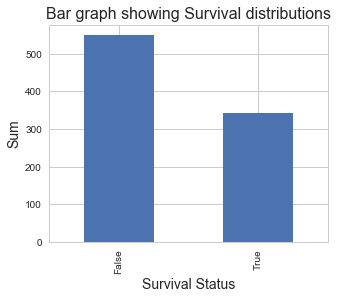

In [281]:
#plot a graph showing survival distribution
Updated_df.groupby('Survived').size().plot(kind='bar', stacked = False)
plt.title("Bar graph showing Survival distributions", fontsize =16)
plt.xlabel("Survival Status", fontsize =14)
plt.ylabel("Sum", fontsize=14)

From the above we can see that there are more people that died than those that survived.

#### Survival By Gender`
looking at the number of male vs women aboard and how many of the survivors were male vs women

In [282]:
#group the data by sex
titanic_data.groupby("Sex")['Name'].count()

Sex
female    314
male      577
Name: Name, dtype: int64

In [283]:
#subset tatanic data into two dataframes 
women_df =Updated_df[(titanic_data['Sex']=='female')]
male_df = Updated_df[(titanic_data['Sex']=='male')]
w=len(women_df)
m=len(male_df)
print('Number of Women: {}, Number of Men: {}'.format(w,m))

Number of Women: 314, Number of Men: 577


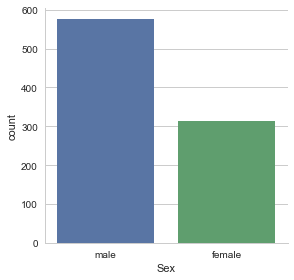

In [284]:
#Number of passengers on titanic in each gender group
sb.factorplot('Sex', data=titanic_data, kind ='count')

From the above we see that the number of males aboard was much greater than the number of women
* lets look at how many of each gender survived

In [285]:
survivors.groupby('Sex').size()

Sex
female    233
male      109
dtype: int64

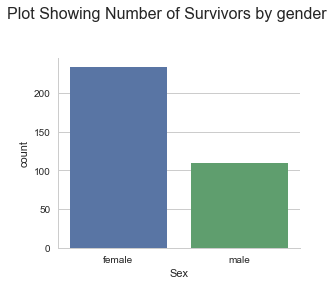

In [286]:
#Number of survivors by gender
P =sb.factorplot('Sex', data=survivors, kind ='count', label="Number Of Survivors")
plt.subplots_adjust(top=0.8)
P.fig.suptitle('Plot Showing Number of Survivors by gender', fontsize =16)

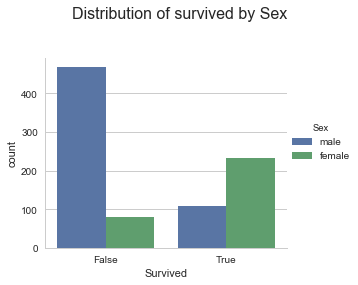

In [287]:
p=sb.factorplot('Survived', data=Updated_df, kind ='count', hue ="Sex", )
plt.subplots_adjust(top= 0.8)
p.fig.suptitle("Distribution of survived by Sex", fontsize =16)

From the above two plots we are able to see that,though the number of males aboard was way greater than women , the number of survivors who are female more than doubles that of the male. I will further investigate the data set to find out what classes the survivors belonged to.

### Adding passenger Class

#### Distribution of Pclass
* Number of passengers per class

In [288]:
Updated_df.groupby('Pclass').size()

Pclass
First Class    216
Sec Class      184
Third Class    491
dtype: int64

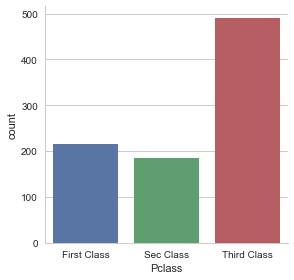

In [289]:
#distribution of passengers by class 
sb.factorplot('Pclass', data=Updated_df, kind ='count', order =['First Class', 'Sec Class', 'Third Class'])

From the above visualization we see that most people were in the third class followed by first class and the least number of people was in the second class. Now that we have looked at the number of passengers per class lets look at the number of survivors in each class

In [290]:
survivors.groupby('Pclass').size()

Pclass
First Class    136
Sec Class       87
Third Class    119
dtype: int64

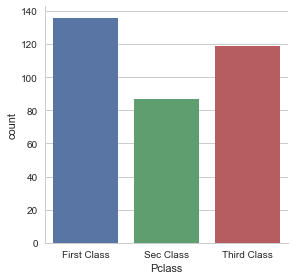

In [291]:
#survivors in each class
sb.factorplot("Pclass", data =survivors, kind='count', order =['First Class', 'Sec Class', 'Third Class'])

From above we can see that there were more survivors in second class than third class, which is surpprising bse its more logical that sec class would survive more than third. This could be as a result of the presence of more people in third class than the second class, we are better of looking at the proportions to better make a good prediction. I will handle that later but first
* Lets look at number of survivors for each class with in gender

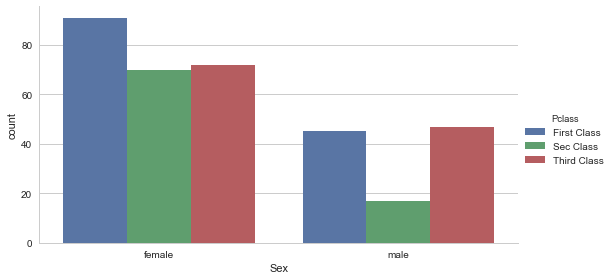

In [292]:
#survivors in each class within gender groups
sb.factorplot('Sex', data = survivors, hue = 'Pclass', kind='count', 
              hue_order=['First Class','Sec Class','Third Class'], size =4 , aspect =1.8)

From the above visualisation, we can see  that even with in the gender groups the number of survivors for the third class still beat those of the second class, and among the males, the third class also beats the first class. This is very surprising so i will have to look at their proportions to make better conclusions.

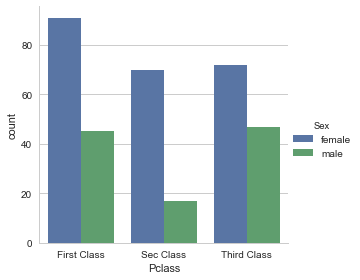

In [293]:
#survivors in each class by gender
sb.factorplot('Pclass', data=survivors, kind ='count', hue ="Sex", 
              order =['First Class', 'Sec Class', 'Third Class'] ) 

### Distibution of Survivors by Gender and PClass

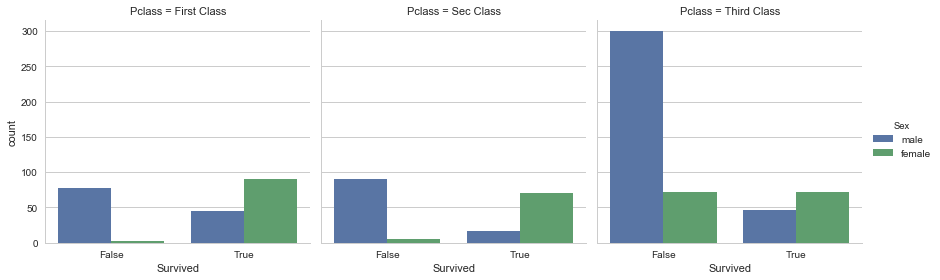

In [294]:
#Distribution of population by gender with in each passenger Pclass
sb.factorplot('Survived', data=Updated_df, kind ='count', hue ="Sex", col="Pclass", 
              col_order=['First Class','Sec Class','Third Class'])

From the above exploration something very significant shows up, a closer look at the plots shows that the number of women who died in first and second class was very small, almost un existance in first class, and really low in sec class.

## Exploring Chacteristics of survivors

### Which gender had a higher chance of survival?
#### Hypothesis

Gender has no impact on the chances of surviving
* H0 = Gender has no impact on survival
* HA = gender has an impact on survival

In this section , I will be looking to find out whether there is a relationship between someone's sex and survival

Table of Survivors by Gender

In [295]:
#table of survivors by gender
Gender_Table = pd.crosstab(Updated_df['Survived'], Updated_df['Sex'])
Gender_Table

Sex,female,male
Survived,,
False,81,468
True,233,109


Proportions of survivors by Gender

In [296]:
Male_survivors =survivors[(survivors.Sex == 'male')]
Female_survivors= survivors[(survivors.Sex == 'female')]

#calculate percentages of survival by sex.
male_Pos= np.round((len(Male_survivors)/len(survivors))*100)
female_Pos= np.round((len(Female_survivors)/len(survivors))*100) 

#display the survival proportions by gender
print("{} % of survivors were male, {} % were Women".format(male_Pos,female_Pos))

#Calculate proportions of survival with in the sub groups

# male survivors as apercentage of total males aboard
Num_Males= titanic_data[(Updated_df['Sex']=='male')]
male_Suv_percent=np.round((len(Male_survivors)/len(Num_Males))*100) 

#Female survivors as a percentage of total women aboard
Num_Females =titanic_data[(Updated_df['Sex']=='female')]
female_suv_Percent =np.round((len(Female_survivors)/len(Num_Females))*100) 

#display survival portions within Gender
print("{} % of all men Survived and {} % of all women survived".format(male_Suv_percent,female_suv_Percent ))



32.0 % of survivors were male, 68.0 % were Women
19.0 % of all men Survived and 74.0 % of all women survived


In [297]:
#cross checking the above calculations
titanic_data.groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

## Graphical representation of Survival proportions by Gender

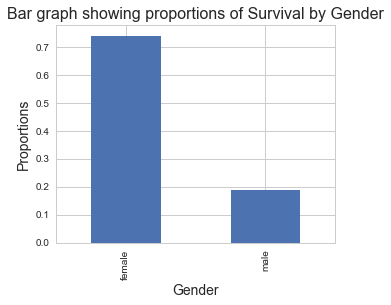

In [298]:
SurvivalByGender =titanic_data.groupby('Sex')['Survived'].mean()
SurvivalByGender.plot(kind ='bar')
plt.title("Bar graph showing proportions of Survival by Gender", fontsize =16)
plt.xlabel("Gender", fontsize =14)
plt.ylabel("Proportions", fontsize=14)

From the above we can see that only 18.8% of males survived compared to 74% 0f ladies, 

## Relationship between survival and gender
I will be looking at the proportions of survival by Gender within the distinct passenger classes

In [299]:
# creating a dataframe from the above proportions
Gender_df = pd.DataFrame( {'Sex': ['Female', 'male',], 'Gender_Surv': [0.74, 0.189 ], 'Gender_Number': [2,1] } )
Gender_df


,Gender_Number,Gender_Surv,Sex
0,2,0.740,Female
1,1,0.189,male


In [300]:
pearsonr(Gender_df.Gender_Number, Gender_df.Gender_Surv) #find correlation between gender and survival

C:\Users\Claire\Anaconda3\lib\site-packages\scipy\stats\stats.py:3031: RuntimeWarning: invalid value encountered in double_scalars
  prob = _betai(0.5*df, 0.5, df/(df+t_squared))
C:\Users\Claire\Anaconda3\lib\site-packages\scipy\stats\stats.py:5277: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


(0.99999999999999978, nan)

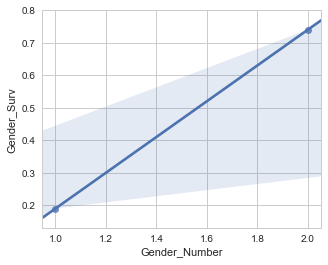

In [301]:
sb.regplot(x = 'Gender_Number', y = 'Gender_Surv', data= Gender_df , scatter = True )

given the r value of 0.9, i woould reject the null hypothesis that gender does not contribute to survival

### Survival By Age Group

### Which age group had a higher chance of survival?
#### Hypothesis

Age group does impact the chances of survival
* H0 = Age Group has no impact on survival
* HA = Age Group does impact the chances of survival

Number of Survival Per age group

In [302]:
#tabular presentation of survival by age group
table =pd.crosstab(Updated_df['Survived'], Updated_df['age_group'])
table

age_group,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79
Survived,,,,,,,,
False,24,61,245,101,71,28,13,6
True,38,41,113,84,39,20,6,0


#### Distributions of age groups
From the above table we can see that most of the people aboard the titanic were aged between 20 and 29, this can be seen better on a bar graph.

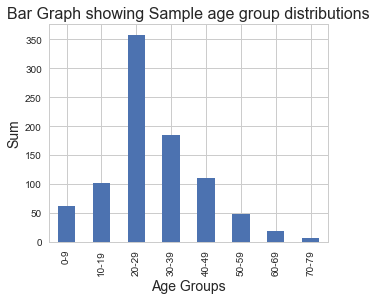

In [303]:
#creates a bar graph showing the distibutions of age groups
Updated_df.groupby('age_group').size().plot(kind='bar', stacked = False)
plt.title("Bar Graph showing Sample age group distributions", fontsize =16)
plt.xlabel("Age Groups", fontsize =14)
plt.ylabel("Sum", fontsize=14)

From the bar graph above, we can see that most of the people aboard the titanic were aged between 20 and 29 years. 

Proportions of age-group that survived 

In [304]:
Updated_df.groupby('age_group')['Survived'].mean()

age_group
0-9      0.612903
10-19    0.401961
20-29    0.315642
30-39    0.454054
40-49    0.354545
50-59    0.416667
60-69    0.315789
70-79    0.000000
Name: Survived, dtype: float64

The proportions give us a better picture of the contribution of age groups to survival than the count figures, i am going to go ahead a create a visual for this too

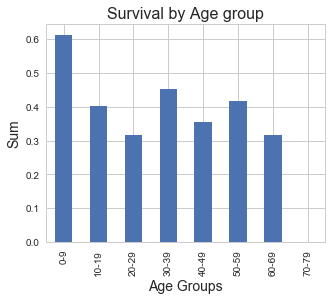

In [305]:
#creates a bar graph showing the proportins of survival by age groups
Updated_df.groupby('age_group')['Survived'].mean().plot(kind='bar')
plt.title("Survival by Age group", fontsize =16)
plt.xlabel("Age Groups", fontsize =14)
plt.ylabel("Sum", fontsize=14)

## Relationship between Age and Survival

In [306]:
#group by age groups
age_group_proportions =Updated_df.groupby('age_group')['Survived'].mean()
#create a dataframe with age group proportions data
Age_vs_Survival= pd.DataFrame(age_group_proportions)
#add a column for numeric number for each group
Age_vs_Survival['Age_Key'] =[1,2,3,4,5,6,7,8]
#display first three rows of the dataframe
Age_vs_Survival.head(3)

,Survived,Age_Key
age_group,,
0-9,0.612903,1
10-19,0.401961,2
20-29,0.315642,3


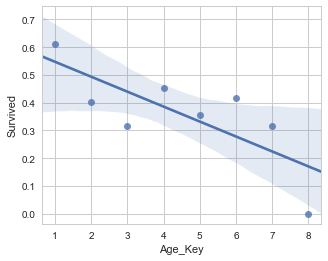

In [307]:
#graph showing survival rate per ageroup
sb.regplot(x='Age_Key', y='Survived', data=Age_vs_Survival, scatter=True)

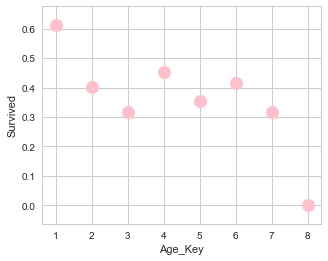

In [308]:
Age_vs_Survival.plot(kind='scatter', x='Age_Key', y='Survived', c=['pink'], s=160)

The graph above shows that the younger children did survive more than the adults, but when it gets to adults its not very clear whether age really contributed to survival.
* I will calculate the correlation and p value.

In [309]:
#gettting the correlation between age and survival and P.value
pearsonr(Age_vs_Survival['Age_Key'],Age_vs_Survival['Survived'])

(-0.75819901661158862, 0.029244210864030052)

The above r value of -0.76 shows that there is a strong negative relationship between survival and age. The P Value is also less than 0.05, therefore i will reject the null hypothesis that age has no impact on survival.

### Survival by passenger Class

### Which social class stands a higher chance of surviving?
#### Hypothesis
Social class does impact the chances of survival
* H0 = Social Class has no impact on survival:
* HA = Social Class does impact the chances of survival

#### Crosstable for Survived and Passenger Class

In [310]:
#Tabular presentation of survived and Passenger class
table =pd.crosstab(Updated_df['Survived'], Updated_df['Pclass'])
table

Pclass,First Class,Sec Class,Third Class
Survived,,,
False,80,97,372
True,136,87,119


In [311]:
#proportions with in the pclasses
Class_df =Updated_df.groupby('Pclass')['Survived'].mean()
Class_df

Pclass
First Class    0.629630
Sec Class      0.472826
Third Class    0.242363
Name: Survived, dtype: float64

From the above table we can see that 62% of first class members survived , 47% of second class survived and only 24% of their Class survived hence its safe to conclude that the class of the passengers may have impacted their survival. I will look at the pearonsr andd p values to confirm my suspitions later

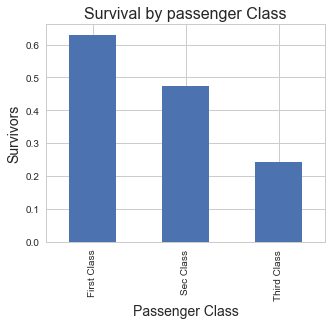

In [312]:
#creates a bar graph showing the proportins of survival by class
Class_df.plot(kind='bar')
plt.title("Survival by passenger Class", fontsize =16)
plt.xlabel("Passenger Class", fontsize =14)
plt.ylabel("Survivors", fontsize=14)

### Relationship between class and survival

In [313]:
Class_df =pd.DataFrame(Class_df)
Class_df['class_Num']=[1,2,3]
Class_df.columns=['ClassSurvivalRate', 'ClassNumber']
Class_df

,ClassSurvivalRate,ClassNumber
Pclass,,
First Class,0.629630,1
Sec Class,0.472826,2
Third Class,0.242363,3


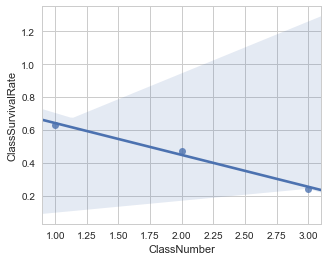

In [314]:
#relationship between survived and pclass
sb.regplot(data=Class_df, y ='ClassSurvivalRate', x = 'ClassNumber' , scatter =True)

From the above plot we see that as the class number goes up, the survival rate decreases

In [315]:
pearsonr(Class_df.ClassSurvivalRate,Class_df.ClassNumber) #calculating correlation and p value

(-0.99402435522718258, 0.069631220920609235)

The r value of -0.9, shows a strong correlation between passenger class and survivals rate but the P value of 0.06 does not let us reject the null hypothesis that passenger class doesnt impact survival.

# Conclusion
Based on the pearsonr statistics and P-values calculated it is safe to conclude that gender and social class do contribute to survival. When it gets to age , the r value of -0.09 shows a strong positive correlation, this may have been becausse children age seemed to affect survival the younger the child the better the survival chances but that didnt show up at the adults section. I also got a Pvalue of 0.06 so couldnt reject the null.
its also important to note that correlation does not really mean causation, the socal class, gender and sex, relate to survival but there could have been several other reasons that contributed to survival, like past experience, race,cultural background, level of education , the strenth of people and how athletic they are.

# Limitations of the study
While doing the study I was challenged with the below listed limitations.
1. I used the Titanic dataset to find out the characteristics of the passengers that let to their survival. The data that I used was from the public dataset, it maynot have been intended for that kind of research so their could have been some information that was left out that might have been good for the research.

2. The dataset had missing age values, embarked and cabin. I used the mean with in social class and gender to take care of the missing age data this is a limitation because when you try to get statistics about the data for analysis the mean and median are not really what they are.

3. The Parch column wasnt well described, the documentation says it shows how many parents a child has but we had people with 6 parents, so i wasnt sure if the variable was for relatives because i  dont think anyone can have 6 parents.

4. Correlation is not causation. I used data to come up with conclusions, that are based on correlation, but there could be other factors that contributed to survival for example, the strenth of people, how athletic they are, their cultural background, level of education, past experience and race could have contributed to their survival.


## Resources: 

https://en.wikipedia.org/wiki/RMS_Titanic

https://sourceforge.net/p/jupiter/wiki/markdown_syntax/#md_ex_pre

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html

http://matplotlib.org/gallery.html#statistics


